In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disney-movies/Disney_movies.csv


In [106]:
# 1.Read the data file & create dataframe
df = pd.read_csv("/kaggle/input/disney-movies/Disney_movies.csv")


In [107]:
# 2. Basic statistical values for each variable
print(df.info())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          115 non-null    int64  
 1   movie_name          115 non-null    object 
 2   Produced by         113 non-null    object 
 3   Music by            115 non-null    object 
 4   Productioncompany   115 non-null    object 
 5   Running time        115 non-null    object 
 6   Country             102 non-null    object 
 7   Language            110 non-null    object 
 8   Budget(Milion)      41 non-null     object 
 9   Box office(Milion)  97 non-null     float64
 10  SuccessCategory     115 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 10.0+ KB
None
       Unnamed: 0  Box office(Milion)
count  115.000000        9.700000e+01
mean    57.000000        1.981118e+06
std     33.341666        5.403260e+06
min      0.000000        1.000000e+00


In [108]:
# 3.Summary of data counts of Hit, Flop, Mid
print(df["SuccessCategory"].value_counts())

SuccessCategory
Flop    70
Hit     43
Mid      2
Name: count, dtype: int64


In [109]:
# 4.Number of missing values in each variable
df.isnull().sum()

Unnamed: 0             0
movie_name             0
Produced by            2
Music by               0
Productioncompany      0
Running time           0
Country               13
Language               5
Budget(Milion)        74
Box office(Milion)    18
SuccessCategory        0
dtype: int64

In [110]:
# 5.1 Take missing values into one notation= NaN
missing_value = ["N/A","na"," ",np.nan]
df = pd.read_csv("/kaggle/input/disney-movies/Disney_movies.csv",na_values=missing_value)


In [111]:
# 5.2 Select suitable filling methos to each column:

# Produced_by --> Backward Filling   --> Produced by is a object type column therefore we use backward or forward filling method.
# Country     --> Forward filling    --> Here the most number of movies are in United States therefore we can predict rest are also in United States
# Language    --> Forward filling    --> Highest number of movies in English therefore we assume reat are also in english
# Budjet      --> Interpolate method --> When analysing Success Category in the future these numerical values will be helpful.
# Box_Office  --> Interpolate method --> We can't remove this column because it hasn't more than 75% null values therefore we use this method to fill missing values.

In [112]:
# 5.3 Fill missing values using above methods

df["Produced by"].fillna(method='bfill', inplace=True)
df["Country"].fillna(method='ffill', inplace=True)
df["Language"].fillna(method='ffill',inplace=True )
df["Budget(Milion)"] = df["Budget(Milion)"].interpolate()
df["Box office(Milion)"] = df["Box office(Milion)"].interpolate()

In [113]:
 # 6. Check nulls again
df.isnull().sum()


Unnamed: 0            0
movie_name            0
Produced by           0
Music by              0
Productioncompany     0
Running time          0
Country               0
Language              0
Budget(Milion)        0
Box office(Milion)    0
SuccessCategory       0
dtype: int64

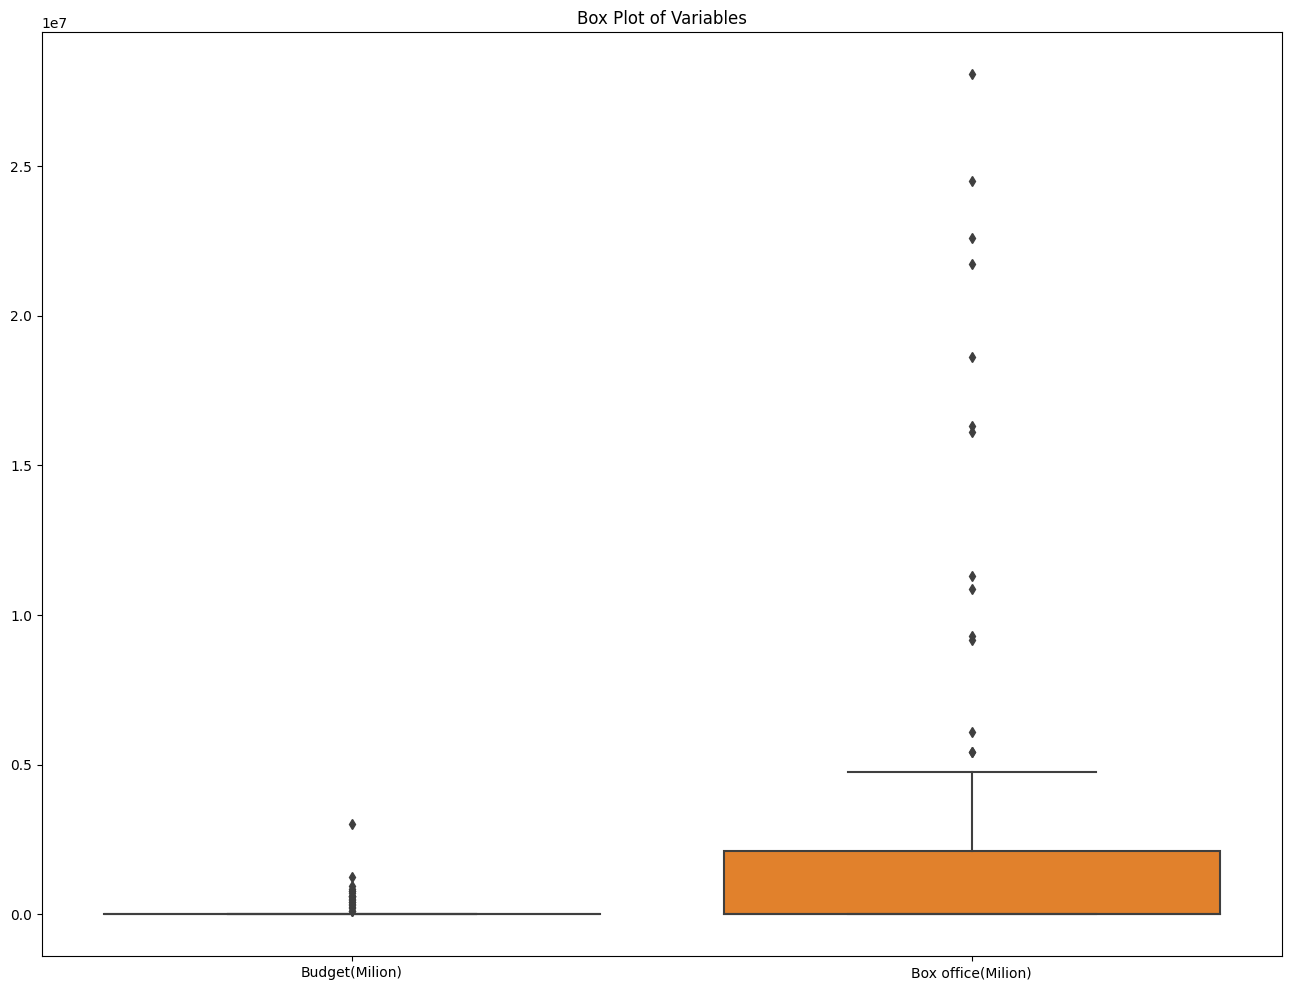

In [114]:
# 7.Visualize each variable using box plot
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
plt.figure(figsize=(16, 12))
sns.boxplot(data=df)
plt.title('Box Plot of Variables')
plt.show()

In [115]:
# BU = Budget(Milion)
BU_Q1 = df['Budget(Milion)'].quantile(0.25)
BU_Q3 = df['Budget(Milion)'].quantile(0.75)
BU_IQR = BU_Q3 - BU_Q1

# Remove outliers in Budget(Milion)
BUthreshold = 0.5
BUoutliers = df[(df['Budget(Milion)']< BU_Q1 - BUthreshold * BU_IQR) | (df['Budget(Milion)'] > BU_Q3 + BUthreshold * BU_IQR)]
df = df.drop(BUoutliers.index)


In [116]:
# BO = Box office(Milion)
BO_Q1 = df['Box office(Milion)'].quantile(0.25)
BO_Q3 = df['Box office(Milion)'].quantile(0.75)
BO_IQR = BO_Q3 - BO_Q1

# Remove outliers in Box office(Milion)
BOthreshold = 0.5
BOoutliers = df[(df['Box office(Milion)']< BO_Q1 - BOthreshold * BO_IQR) | (df['Box office(Milion)'] > BO_Q3 + BOthreshold * BO_IQR)]
df = df.drop(BOoutliers.index)


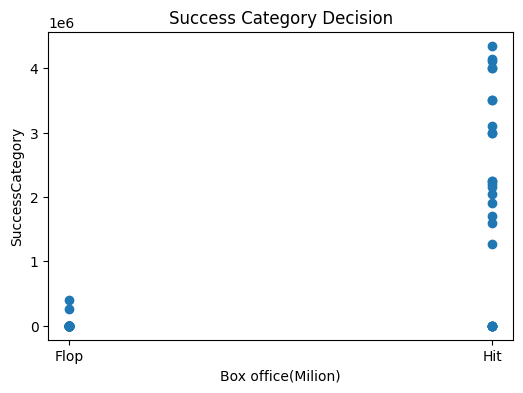

In [117]:
# 8.Identify variables that can affect SuccessCategory

plt.figure(figsize=(6,4))
plt.scatter(df['SuccessCategory'],df['Box office(Milion)'])
plt.title('Success Category Decision')
plt.xlabel('Box office(Milion)')
plt.ylabel('SuccessCategory')
plt.show()

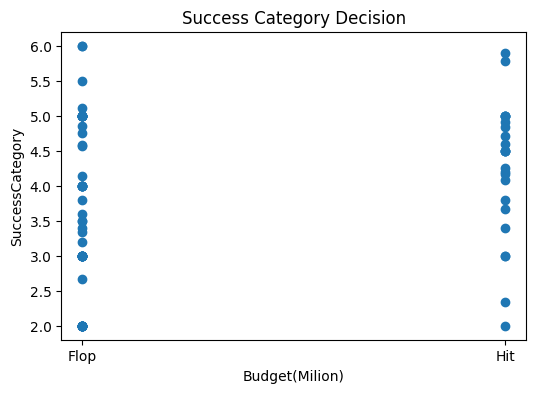

In [118]:
plt.figure(figsize=(6,4))
plt.scatter(df['SuccessCategory'],df['Budget(Milion)'])
plt.title('Success Category Decision')
plt.xlabel('Budget(Milion)')
plt.ylabel('SuccessCategory')
plt.show()

In [119]:
# Conclusion 
#1.
# According to the first graph which shows the relationship between Box Office(Milion)
# and Success Category, when the Box Office(Milion) variable is increasing the Success
# Category is also increased.

# 2.
# According to the second graph which shows the relationship between Budget(Milion) and
# Success Category, when the Budget(Milion) is increasing the Success Category is decreased.

# Therefore we can say, the Success Category show a positive relationship with the 
# variable Box Office(Milion).